## Python Frontend
This notebook demonstrates the Python frontend to MPB.

In [1]:
%load_ext autoreload
%autoreload 2
from mpb import MPB, MultipleMPB
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
# make sure to not use Level-3 fonts
mpl.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt

In [2]:
mpb = MPB()

Any configuration values (or subtrees) can be set and retrieved using the bracket operator on the `MPB` instance. The key is a string and by using the dot-notation, a path can be given:

In [3]:
mpb["ompl.seed"] = 4  # set the seed of the OMPL planners

Some helper functions are available to set environment properties, and configure the planners, steer functions and post smoothers:

In [4]:
mpb.set_corridor_grid_env(radius = 3)
#mpb.set_planners(['rrt', 'rrt_star', 'informed_rrt_star'])
mpb.set_planners(['fpest', 'fprrt', 'fpsst', 'fpkpiece'])
mpb.set_robot_models_functions(['kinematic_car', 'kinematic_single_track'])
mpb.set_exact_goal_radius(1.0)
#mpb.set_steer_functions(['reeds_shepp'])

1.0


Run the motion planning benchmark:

In [5]:
mpb.run(id='test_run', runs=3)  # optional run ID, number of runs (environments)

Running MPB with ID test_run (log file at test_run.log)...


0

In [6]:
mpb.print_info()

+++++++++++++++++++++++++ Run #0 (1 / 6) +++++++++++++++++++++++++
+ Robot Model:        Kinematic Car 
+ Environment:     grid
+ Planners:        SST, RRT, KPIECE1, EST
+ Found solution:  4 / 4
+ Exact solution:  2 / 4
+ Found colliding: 0 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #1 (2 / 6) +++++++++++++++++++++++++
+ Robot Model:        Kinematic Single Track 
+ Environment:     grid
+ Planners:        SST, RRT, KPIECE1, EST
+ Found solution:  4 / 4
+ Exact solution:  0 / 4
+ Found colliding: 2 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #2 (3 / 6) +++++++++++++++++++++++++
+ Robot Model:        Kinematic Car 
+ Environment:     grid
+ Planners:        SST, RRT, KPIECE1, EST
+ Found solution:  4 / 4
+ Exact solution:  2 / 4
+ Found colliding: 0 / 4
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

+++++++++++++++++++++++++ Run #3 (4 / 6) +++++++++++

Visualize the planner trajectories:

Visualizing test_run_results.json


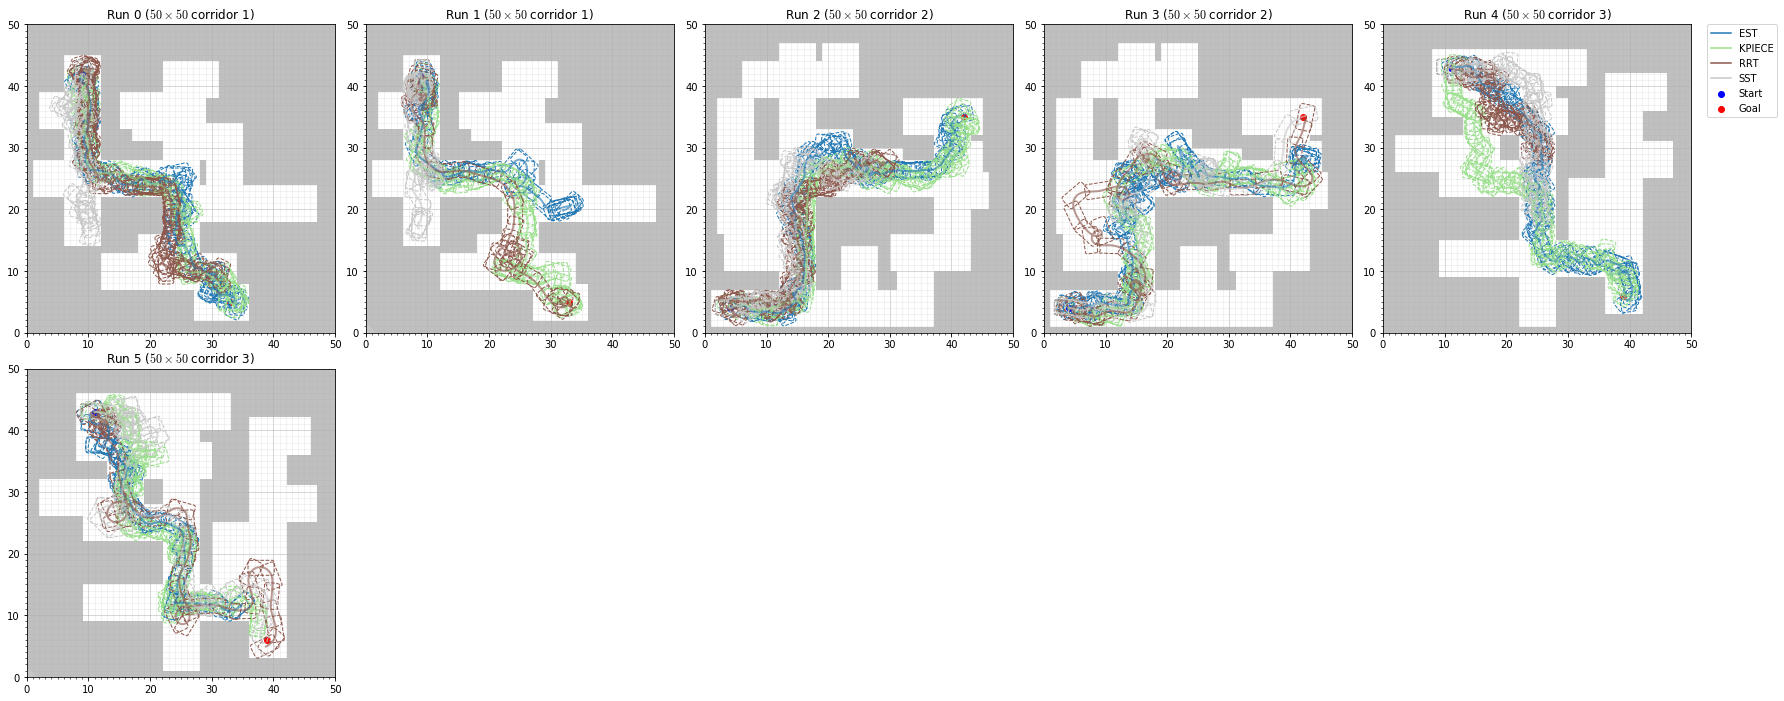

In [7]:
mpb.visualize_trajectories()

Plot planner statistics:

Visualizing test_run_results.json...


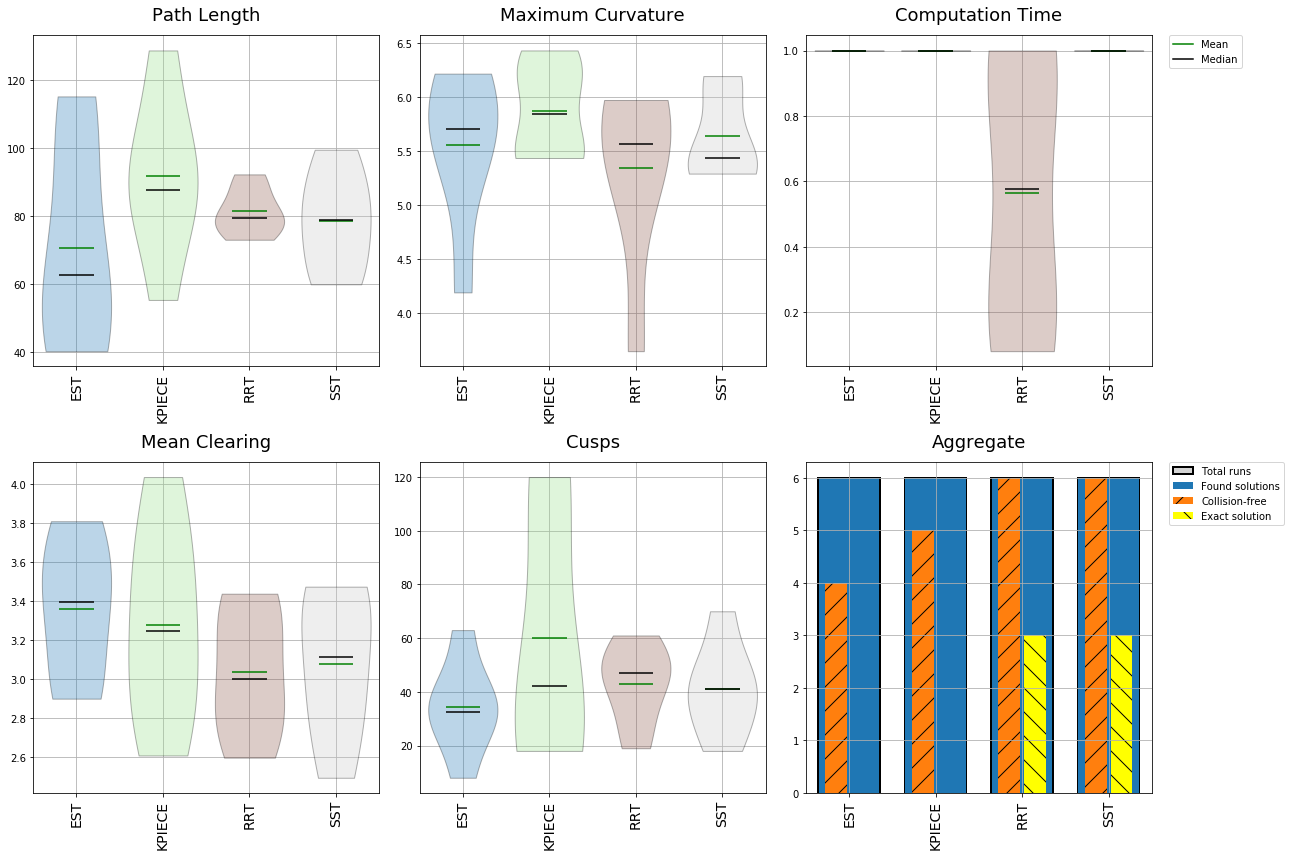

In [8]:
mpb.plot_planner_stats()

We can also use the frontend to compare the solutions of the anytime planners over the course of a given time interval. Let's take an Informed RRT* planner and run it on the time allotments of 0.5s, 1s and 10s:

In [ ]:
ms = []
for time in [.5, 1, 10]:
    m = MPB()    
    m["max_planning_time"] = time
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=3)
    m.set_planners(['informed_rrt_star'])
    m.set_steer_functions(['reeds_shepp'])
    m.run('anytime_%.1f' % time)
    ms.append(m)    

Visualize the results:

In [ ]:
plt.figure(figsize=(6 * len(ms), 6))
for i, m in enumerate(ms):
    plt.subplot(1, len(ms), i+1)
    m.visualize_trajectories(headless=True, combine_views=False, use_existing_subplot=True, show_legend=False)
    plt.title("%.1f s" % m["max_planning_time"])
plt.tight_layout()
plt.savefig("informed_rrt_star_anytime.pdf")

Multiple benchmarks can also be run in parallel using `MultipleMPB`:

In [ ]:
pool = MultipleMPB()
for time in [.5, 1, 10]:
    m = MPB()    
    m["max_planning_time"] = time
    m.set_corridor_grid_env(width=150, height=150, branches=100, radius=3)
    m.set_planners(['informed_rrt_star'])
    m.set_steer_functions(['reeds_shepp'])
    pool.benchmarks.append(m)
    
pool.run_parallel('test_parallel', runs=5)

In [ ]:
pool.visualize_trajectories(run_id='1')